In [1]:
import randomwalk as rw
import numpy as np
import matplotlib.pyplot as plt

# CW10 : Monte Carlo Techniques

The word "Monte Carlo" is a fancy term for what essentially means "using random numbers." Since computers are good at generating (pseudo)random numbers quickly, it can be advantageous to use this randomness for simulations. In this notebook, you will explore a few interesting examples of this idea.

## Estimating $\pi$
As a simple example, consider the following technique for computing the number $\pi$:
  - Area of a unit circle : $\pi$
  - Area of a the minimum box that fits the unit circle, with side length 2 : $4$
  - Fraction of area of the box taken up by the unit circle: $\pi/4$
  - Therefore: If one finds the fraction of random points that uniformly cover such a box that fall inside the unit circle, then multiplying this fraction by 4 will yield $\pi$.

Let's test this idea:

In [2]:
def estimate_pi(N=100000):
    # Generate N random x and y coordinates within the box with sides from [-2,2]
    xs = np.random.uniform(-1,1,N)
    ys = np.random.uniform(-1,1,N)
    # Count how many points lie within the unit circle
    circle = np.where(xs**2 + ys**2 < 1, 1, 0).sum()
    # Compute pi
    return 4 * circle / N

In [3]:
for N in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    print("N=",N, " : pi=", estimate_pi(N))

N= 10  : pi= 2.8
N= 100  : pi= 3.28
N= 1000  : pi= 3.068
N= 10000  : pi= 3.1552
N= 100000  : pi= 3.14092
N= 1000000  : pi= 3.14032


N= 10000000  : pi= 3.1424824


Not bad for such a simple idea!

## Integrating a Function

Consider the following definition for integrating a function $f(x)$ between $x\in[a,b]$:

In [4]:
def estimate_integral(f,a,b,N=100000):
    xs = np.random.uniform(a,b,N)
    return f(xs).sum() * (b-a)/N

What does this do? It generates $N$ randomly chosen points $x_i$ in the range $[a,b]$, then finds the average function value of all those points $\bar{f} = \sum_{i=1}^N f(x_i)/N$, then multiplies this average value by the interval length to find the area: $A = \bar{f}*(b-a)$. This method relies upon the theorem in calculus that the integral is equal to the average value of the function over a domain times the domain itself (essentially approximating the whole integral as one big rectangle). Let's see how well it works in practice.

Recall that $\int_0^{2\pi}\sin(x)dx = 0$. Let's try to compute that using Monte Carlo methods:

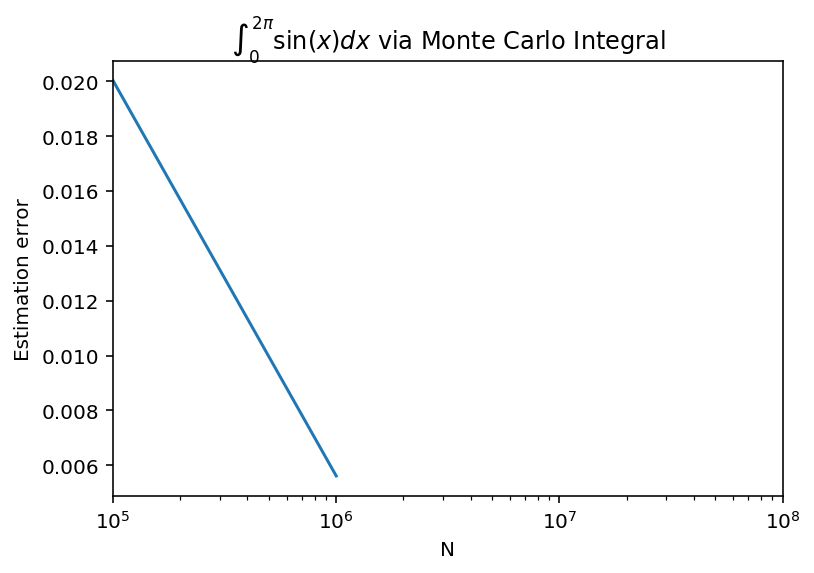

In [5]:
Ns = [10**i for i in range(5,7)]
Is = [estimate_integral(np.sin, 0, 2*np.pi, n) for n in Ns]
plt.semilogx(Ns,Is)
plt.title(r"$\int_0^{2\pi}\sin(x)dx$ via Monte Carlo Integral")
plt.xlabel("N")
plt.ylabel("Estimation error")
plt.xlim(10**5,10**8)
plt.show()

It does in fact converge eventually. Though this method is vastly less efficient than the trapezoid rule we have been using deterministically in 1D, it turns out that for higher dimensional integrals (like 10D) this stochastic technique can substantially outperform similar deterministic strategies.

## Random Walks

Where Monte Carlo methods really shine is in approximating behavior that is common in thermodynamics. For example, the air molecules in a room collide with each other constantly, effective jostling each other into random bits of short motion between collisions. Similarly, the molecules in a solid like a table vibrate and randomly exchange packets of energy as they essentially bump into each other - these packets of energy flow through the solid in the form of heat.

If we don't care much about the details of the motion, but want to capture the overall effects of the random jostling, we can simulate random walks of particles.

As a simple example, the following code places 100 particles at the origin of a 2D plane, then has them randomly walk around by taking integer steps in one of the four cardinal directions (E, W, N, S). The resulting animation shows their motion over time.

In [6]:
g = rw.walk_gen(walkers=100)

In [7]:
rw.plot_anim(g, xlim=(-50,50), ylim=(-50,50), max_frames=200)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAGks21kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNjQzIDVjNjU3MDQgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAWqZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAB4HShe6DhKq9DAABvIzcIk3f+ABLO++E67
pBhendidMhig5WmV6h73lqDj7Mh1OsrP9f35GBGKX23n8bzqT7oTWwNaVDGHQZS1Tk42Zt8BMtTD
twpUXrXmNVJNC2SyLhfqlPF65cdQsGzFpMNaBJESVb8QxBvWgQUMZbvilb+VYoQUbuQlR0ET/4rY
TY9eXMjCwRyIVgg6Sj6hr7uNdBumu2p7hDRQAEnUEDh87papwAmwgxaOFP1Hx1s/P4JY1Mn2//A0
soxfSsfTj9lXwG4TxtIKw8Dfd0WKLHQUDzDpLJIBgNnDim7CXJ57bCMV0vhmAnRD7r5PpQp+PbhK
2w67nflvWH6oVE8n6ghcpm9FjRt8pG8iYECzH5vrFEXWLOJ1XsaBxwJZNrxZr4nyXBHl+1Z2PqW+
8pyb9xHsXeqKkS0in8HcWlTDSNvshwhe4zMM7OxcFzn+xmkVxKofzg8FNzFDFfNctjRl9wN+odCs
K9WzBDvIxaYiYioENsYtBRiLF3Udz/50AGW1TGIOcKIE6J69CTUOBMWb9Il4mWnQZq48ZL08Mv4k
qS1TgJ+ZyIM9FByoUc1WYn76wDsXRiCLYb73gZwGDCY2KdJhqEgUpWK7xMdLCuLECs20KjqF7616
wCYmSHdOqCEJfJlol3bHUFyGVQ49ITABr2Br/yH6rz//Tcob1/f6aaqUqRE35jPmPlq2ov5YJ2pl
b2/g5g2w9D3Qk1rpLal/AVXvPpfUCIE1wZTqlmcUT0qIlW+WtpQOPZx5UZgpZSng8CGAXBkG0+Dw
eFl5HNKVgcBIcpTh+oAtgFmipqsbGaWWOivNwmIvFy85T9h5tSTxfnfIt8bkVcccAI2AAk4uDJHg
0t+nTNUIJkKVb3V/650u3cSauBNmiyHVh/V33HQM9VeE8QWRWq4iYZicJkwklMz2dr5Nc0UPCHRU
clbeD4X+aK+Y7mRQ/MyURzj1wyvMMa8NEM5ynAN18tL64mPrAR8TL1y51j78RCB8HK2tSxLCd7hB
g0ag/i50veKLzwh2AEFWKXiM2e8XQ0nnghIeSyBk6CIQrAUzJTcvTc9PUXlSk26WYfp1SUzc82GQ
3p8xGbKjjsmdDgBg8UY+sPKnV8PIfUxTY/JS8CfosUBr6IMadUpxhH8J1w++MrQKljk8Cq+qJDNu
Hzhfk+MWG4zOi8VC9TQObuxWtFI9RqkjlfiztOCHsl47Fxqz9PSxTsz4YuAMa/Xb98Co4i+zqqHj
ytqC+W1OWwKkce6WbA+tK+Eb5Mqgzma+klQB9734t37WIuSNHl5mJ5oHNMjD7nUb7hBW9Ots5WUQ
yznetEj4PXUMXAt5+RTbtNOckRB2ZnNloKjtvqDY12x8nrj2NI5T/MOouLJckCupow3GeKlMMqyW
IlWvlRJJCtBcf1i0EebQEKpmZ8KFiGLmBAB8qKA1ay9b1MaXfAgj0gdowZ7Cb9HehZ5eQD7dVAwD
USDSIqzF7ZzWl30quGJ8yLjVOXt9j8+aN5nAFOlMrmSRGeL+x487d/tTxG6oKg49Q7u8VAdoMwi0
+cdJ1uExUGmQER23aZ14FLfrKaj+0Qk/8KU0tQrbQOzYaNi6i+ly+RITdtIXkmJRE5NznhHkJg+M
sL8tCGCctNhFBhv+lF/75GfNpsyZKyi4bSLy1NWOrZX1Nml65H52PcBTp63IH/BPc2LozT0k6bQA
bJZPar4cL6F10E/rhfUd4MM9i+eU/brIVZ77pcwEFiGOvHUD5U52BkpQFZZf3xe1kV4JHon+s3pa
U8XqXspX3oeREAmnuqgptz4lPMLeRaOGUCjulK/wTWXaAVCNl+oOYCYefL/fS4mO8loW0s5XdRqN
X+KMWM952G98GgtsgDaq/QagJvNxQQAAAXtBmiRsQz/+nhBnbHc6ZXpeqsIFoBMMpq3zCkr8+138
pSepc+2KV3HHdNE4GU9praz9mphSMoPmkXlUTveHgv7J0/VmIaqZ03aL59tUy8WunGfry8XWBRXY
nPhP5S5XgNSg8jlMT57bn+NNS3NLlA590CsexeU7ZhhjAb7XjqDkL2/KEXS/AAyvPQl41mHO+I2g
gsn4PScCPtjyyUjp4HqTI44VA7zSqYyj/MJiUNinIwQZ2VJwjWl6U/jG7NvgaWze8lby8beWkeAV
06l55EjwLjJHEMHTCGw4+fvtMC7PrkPtYvf8QXfmqG15mQ0Y6yew8OeBaT7qAsFonFDbybM5DC6v
oScBpkVlHy8A8AmEm5d5jLJvA94WHLBWCG+3a5Iwg+abf7fTCppsjHpvOpslqyK80tPEKkAzsFmt
P5fBYCK5cktZTSpGkq1ssdu7ODJ4zOPMreqFriffX0DFU4lQjZQCXfSaqaQEdb7k5nN5FMl+NA8b
Jqq5bomAAAAAiUGeQniEfwR9111qW26kSvkLWHi+C8zYMZhxSKwNOlgEb2odzzDJyDzzB/rSbzGb
HvYgVOuqVQMRsYcfdIcWDFuB7tYAAnJkP1z67Gf7CPVGmGYrPiW2o8ZKLyDuGwx0YPBlg3adX4Uk
WcdnnfqXpPAVCDRC8ldq8YxSyZSOqtXhv06kcIKc3oz9AAAATgGeYXRH/wfrzEHkWi8v+wAAAwAA
bRJ2qZYPBUWjjeweAgkAJPAXRzX3u33FmVyStnAljhcGV19MqZx4o/5AeHuufeH0Gq12hlNXiJSg
QAAAAGABnmNqR/8H7buqwK/rQ3psJAAAAwBRCUyw+y0RDHdKT8YCABCARGEvXmqX7qyGn7wRhvv/
5Avt08t8p5vHZQdD2EaA0pUqAlQxe+AGnLML0cxAP22G8aXxK2jncwTudkEAAAEFQZpoSahBaJlM
CGf//p4Qf+LHPMMHyhNMt

## Exercise

Create a new random walk generator that prevents the particles from passing through a box with walls at $x=-20,20$ and $y=-20,20$.  To make things interesting, place a hole in your box at $x=20$ for the range $y\in[-4,4]$ such that particles can wander freely in that region of the hole as before.  Make sure particles outside the box and inside the box cannot move through the box walls, but otherwise move freely.  Modify the animation function so that the initialization frame draws the boundaries of your box in addition to the particles.

In [8]:
rw.new_plot_anim(g, xlim=(-50,50), ylim=(-50,50), max_frames=200)

AttributeError: module 'randomwalk' has no attribute 'new_plot_anim'